# SALES - Excel Data with Python Pandas
#### Võ Hửu Nghĩa

QUESTIONS:
1. What wes the best month for sales? How much was earned the month?
2. What city has the best sales?
3. What time should we display ads to maximize the likelihood of customer's by product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?


 IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [36]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [37]:
path = 'D:/Python-for-Data-Analyst/DataSet/Sales Reporting/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


GỘP CÁC TẬP DỮ LIỆU LẠI

In [38]:
df = []
all_length = []
for file in os.listdir(path):
    # Trường hợp chỉ mún lấy các file theo mong mún, vd có đuôi .csv
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        df.append(df1)
        length_1month = len(df1.index)
        all_length.append(length_1month)
# Gộp các kết quả lại với nhau
result = pd.concat(df)
print(result,sum(all_length))



      Order ID                   Product Quantity Ordered Price Each  \
0       141234                    iPhone                1        700   
1       141235  Lightning Charging Cable                1      14.95   
2       141236          Wired Headphones                2      11.99   
3       141237          27in FHD Monitor                1     149.99   
4       141238          Wired Headphones                1      11.99   
...        ...                       ...              ...        ...   
11681   259353    AAA Batteries (4-pack)                3       2.99   
11682   259354                    iPhone                1        700   
11683   259355                    iPhone                1        700   
11684   259356    34in Ultrawide Monitor                1     379.99   
11685   259357      USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      01/22/19 21:25          944 Walnut St, Boston, MA 02215  
1    

- Có thể thấy độ dài của 2 kết quả bằng nhau. Điều này chứng tỏ phép gộp các bảng lại với nhau đã thành công 

LƯU TẬP TIN LẠI 

In [39]:
result.to_csv('Sales2019.csv',index=False)

In [40]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


TẠO CỘT MỚI GÁN DỮ LIỆU TỪ CỘT THÁNG TRONG ORDER DATE

In [41]:
result['Month'] = result['Order Date'].str[0:2:1]
result.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
9435,218913,ThinkPad Laptop,1,999.99,06/01/19 18:33,"726 Lincoln St, Boston, MA 02215",06
22315,316980,Flatscreen TV,1,300,12/31/19 11:20,"107 10th St, Los Angeles, CA 90001",12
147,236813,Lightning Charging Cable,1,14.95,08/04/19 15:29,"170 West St, Los Angeles, CA 90001",08
15810,274439,Lightning Charging Cable,1,14.95,10/24/19 04:39,"998 Adams St, Dallas, TX 75001",10
12790,235153,27in 4K Gaming Monitor,1,389.99,07/05/19 12:43,"166 Madison St, San Francisco, CA 94016",07


LẤY RA TÊN CÁC GIÁ TRỊ TRONG THUỘC TÍNH MONTH

In [42]:
print(set(result['Month']))

{'12', '04', nan, '05', '06', '03', '11', '08', '07', '02', '09', '01', '10', 'Or'}


- Ta thấy ngoài 12 tháng thì còn có giá trị ngoại lai là 'nan' và 'Or' . Ta cần phải loại bỏ chúng

KIỂM TRA TỔNG GIÁ TRỊ NULL CỘT MONTH

In [43]:
result['Month'].isnull().sum()

545

XÓA TẤT CẢ CÁC GIÁ TRỊ NULL TRONG TẬP DỮ LIỆU

In [44]:
result = result.dropna(how = 'all')
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


KIỂM TRA LẠI CÁC GIÁ TRỊ CÓ TRONG MONTH

In [45]:
print(set(result['Month']))

{'12', '04', '05', '06', '03', '11', '08', '07', '02', '09', '01', '10', 'Or'}


- Mặc dù đã loại bỏ được giá trị 'nan', nhưng vẫn còn giá trị 'Or'

LOẠI BỎ GIÁ TRỊ OR

In [46]:
result = result[result['Month']!='Or']
result.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3061,153423,AA Batteries (4-pack),2,3.84,02/10/19 17:05,"246 Johnson St, Dallas, TX 75001",02
24249,318832,AAA Batteries (4-pack),3,2.99,12/21/19 11:17,"791 Hickory St, Atlanta, GA 30301",12
9547,257316,Google Phone,1,600,09/02/19 19:17,"673 South St, San Francisco, CA 94016",09
8839,231354,USB-C Charging Cable,1,11.95,07/05/19 23:58,"336 South St, New York City, NY 10001",07
7407,157553,Wired Headphones,1,11.99,02/03/19 21:39,"317 Dogwood St, Dallas, TX 75001",02


In [47]:
print(set(result['Month']))

{'12', '04', '05', '06', '03', '11', '08', '07', '02', '09', '01', '10'}


-Kết quả đã đúng như mong muốn là đã loại bỏ giá trị 'nan' và 'Or'

1. What wes the best month for sales? How much was earned the month?

In [48]:
#result['Sales'] = result['Price Each'] * result['Quantity Ordered']

HIỂN THỊ CHI TIẾT CÁC THUỘC TÍNH

In [49]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


ĐỔI KIỂU DỮ LIỆU CHO 2 THUỘC TÍNH PRICE EACH VÀ QUANTIRY ORDERED

In [50]:
result['Price Each'] = result['Price Each'].astype('float64')
result['Quantity Ordered'] = result['Quantity Ordered'].astype('float64');


C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\2219999650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Price Each'] = result['Price Each'].astype('float64')
C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\2219999650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Quantity Ordered'] = result['Quantity Ordered'].astype('float64');


In [51]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.3+ MB


TẠO RA CỘT SALES BẰNG CÁCH NHÂN 2 GIÁ TRỊ PRICE EACH VÀ QUANTITY ORDERED

In [52]:
result['Sales'] = result['Price Each'] * result['Quantity Ordered']


C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\2084549867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Sales'] = result['Price Each'] * result['Quantity Ordered']


In [53]:
result.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
4090,165898,Flatscreen TV,1.0,300.0,03/18/19 14:32,"918 Lincoln St, Boston, MA 02215",03,300.0
443,176982,iPhone,1.0,700.0,04/14/19 13:53,"237 Lake St, Los Angeles, CA 90001",04,700.0
6841,254709,Macbook Pro Laptop,1.0,1700.0,09/13/19 09:02,"731 Cherry St, Atlanta, GA 30301",09,1700.0


DI CHUYỂN CỘT SALES SANG GẦN 2 CỘT TRÊN ĐỂ QUAN SÁT

In [54]:
moving_column = result.pop('Sales')
result.insert(4,'Sales',moving_column)
result.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01


TÌM GIÁ TRỊ SALES LỚN NHẤT TRONG CÁC THÁNG

In [55]:
sales_value_max =result.groupby('Month').sum()['Sales']
sales_value_max.max()


4613443.34

BIỂU ĐÒ TRỰC QUAN HÓA SỐ LIỆU TRÊN

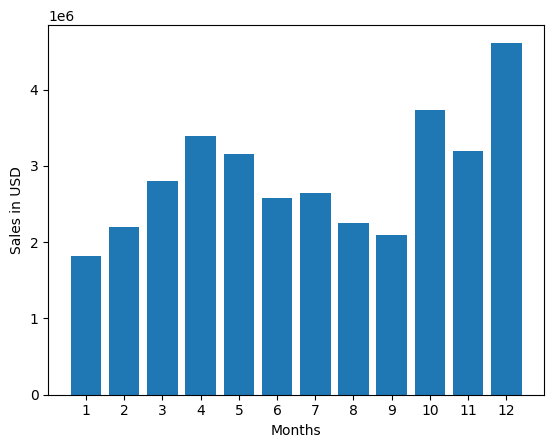

In [56]:
months = range(1,13)
plt.bar(x=months,height=sales_value_max)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()


2. What city has the best sales?

TẠO CỘT MỚI CHỨA TÊN THÀNH PHỐ TỪ CỘT PURCHASE ADDRESS

In [57]:

result['City'] = result['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\360849240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['City'] = result['Purchase Address'].apply(lambda x: x.split(',')[1].strip())


In [58]:
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1.0,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2.0,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1.0,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


HIỂN THỊ CÁC GIÁ TRỊ TRONG CỘT CITY

In [59]:
print(set(result['City']))

{'New York City', 'Seattle', 'San Francisco', 'Dallas', 'Atlanta', 'Los Angeles', 'Portland', 'Boston', 'Austin'}


KIỂM TRA TỔNG GIÁ TRỊ NULL TRONG CỘT CITY

In [60]:
result['City'].isnull().sum()

0

LẤY RA GIÁ TRỊ SALES LỚN NHẤT TRONG CÁC THÀNH PHỐ

In [61]:
City_Sales_Max = result.groupby('City').sum()['Sales']
City_Sales_Max.max()

8262203.91

In [62]:
#cities = result['City'].unique() 
# Không dùng cách này được, bởi vì thứ tự các thành phố trong cities không khớp với City nên cho ra giá trị của bị sai lệch
cities = []
for city,sales in City_Sales_Max.items():
    cities.append(city)
print(cities)

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


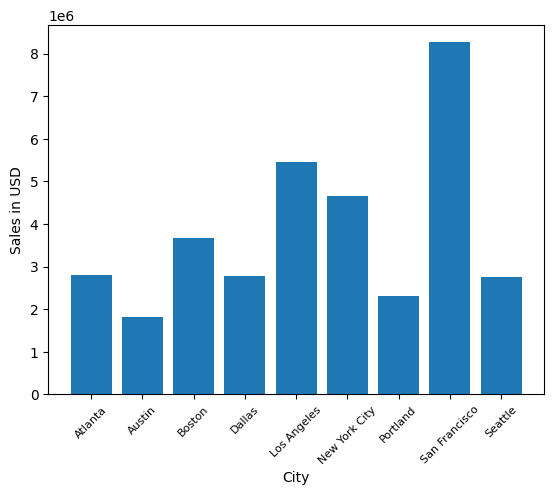

In [63]:
plt.bar(x=cities,height=City_Sales_Max)
plt.xticks(cities,rotation = 45,size = 8)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()


3. What time should we display ads to maximize the likelihood of customer's by product?


ĐỔI KIỂU DỮ LIỆU CỘT ORDER DATE

In [64]:
result['Order Date']=pd.to_datetime(result['Order Date']);


C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\1634758756.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['Order Date']=pd.to_datetime(result['Order Date']);
C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\1634758756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Order Date']=pd.to_datetime(result['Order Date']);


In [65]:
print(result['Order Date'].dtypes)

datetime64[ns]


TẠO CỘT MỚI CHỨA GIỜ TỪ CỘT ORDER DATE

In [66]:
result['Hours']=result['Order Date'].dt.hour
result.head()

C:\Users\vhngh\AppData\Local\Temp\ipykernel_13232\2794683548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Hours']=result['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


ĐẾM SỐ SALES DỰA TRÊN GIỜ

In [67]:
Hours_Sales_Max = result.groupby('Hours').count()['Sales']
Hours_Sales_Max.head(3)

Hours
0    3910
1    2350
2    1243
Name: Sales, dtype: int64

In [68]:
Hours_value = []
for hour,sales in Hours_Sales_Max.items():
    Hours_value.append(hour)
print(Hours_value)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


TRỰC QUAN HÓA SỐ LIỆU TRÊN

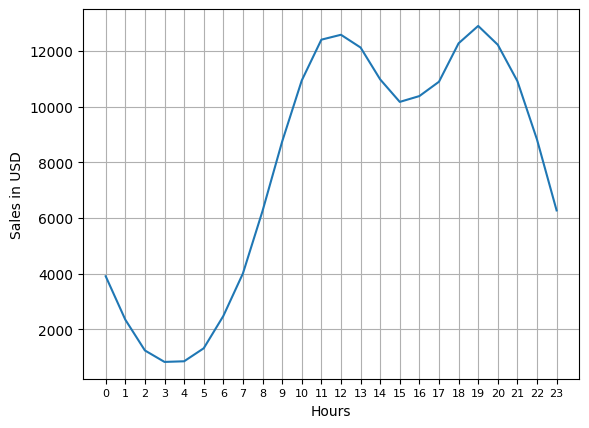

In [69]:
plt.plot(Hours_value,Hours_Sales_Max)
plt.xticks(Hours_value,rotation = 0,size = 8)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()


4. What products are most often sold together?


In [70]:
result.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
5,141239,AAA Batteries (4-pack),1.0,2.99,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,San Francisco,20
6,141240,27in 4K Gaming Monitor,1.0,389.99,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",01,Los Angeles,12
7,141241,USB-C Charging Cable,1.0,11.95,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",01,San Francisco,12
8,141242,Bose SoundSport Headphones,1.0,99.99,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",01,Los Angeles,10
9,141243,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",01,San Francisco,21
